In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [50]:
df.size

3075

In [51]:
df.shape

(205, 15)

In [52]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [55]:
df['normalized-losses'] = df['normalized-losses'].replace('?',np.nan)

In [56]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [57]:
df['normalized-losses'].isnull().sum()

41

In [58]:
df['normalized-losses'] = df['normalized-losses'].astype('float')

In [59]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype  
--------------  -----  
164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [60]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,35.442168,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [61]:
mean = df['normalized-losses'].mean()
df['normalized-losses'] = df['normalized-losses'].fillna(mean)

In [62]:
df['normalized-losses'].unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.2+ KB


In [64]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [65]:
df['horsepower'] = df['horsepower'].replace('?',np.nan)

In [66]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [67]:
df['horsepower'].isnull().sum()

2

In [68]:
df.dropna(inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 25.4+ KB


In [70]:
df['horsepower'] = df['horsepower'].astype('float')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 25.4+ KB


In [72]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,122.000000,65.901478,53.733498,126.857143,104.256158,25.241379,30.748768,13263.266010
std,1.247384,31.837458,2.154835,2.442864,41.845239,39.714369,6.570702,6.920406,7933.310625
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.050000,52.000000,97.000000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,65.500000,54.100000,119.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,66.900000,55.500000,143.000000,116.000000,30.000000,35.000000,16501.500000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [73]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include = ['int','float'])

In [74]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [75]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])


In [76]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,20,1,3,2,0,3
201,20,1,3,2,0,3
202,20,1,3,2,0,5
203,20,0,3,2,0,3


In [77]:
df_new = pd.concat([df_cat,df_num],axis = 1)

In [78]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [79]:
for col in df_new:
    ss = StandardScaler()
    df_new[col] = ss.fit_transform(df_new[[col]])

In [80]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-2.004738,0.33059,-3.055072,1.203681,-0.122474,-2.851234,1.741922,0.000000,-0.838083,-2.024547,0.075292,0.170228,-0.647094,-0.543037,0.029282
1,-2.004738,0.33059,-3.055072,1.203681,-0.122474,-2.851234,1.741922,0.000000,-0.838083,-2.024547,0.075292,0.170228,-0.647094,-0.543037,0.409001
2,-2.004738,0.33059,-0.714772,1.203681,-0.122474,1.877528,0.134603,0.000000,-0.186775,-0.547224,0.602339,1.255637,-0.952228,-0.687894,0.409001
3,-1.834817,0.33059,0.455379,-0.592990,-0.122474,-0.013977,0.938263,1.322462,0.138878,0.232474,-0.427798,-0.056950,-0.189394,-0.108465,0.086777
4,-1.834817,0.33059,0.455379,-2.389661,-0.122474,-0.013977,0.938263,1.322462,0.231922,0.232474,0.219032,0.271197,-1.104795,-1.267324,0.529046


In [81]:
x = df_new.iloc[:,0:14]
x.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,-2.004738,0.33059,-3.055072,1.203681,-0.122474,-2.851234,1.741922,0.000000,-0.838083,-2.024547,0.075292,0.170228,-0.647094,-0.543037
1,-2.004738,0.33059,-3.055072,1.203681,-0.122474,-2.851234,1.741922,0.000000,-0.838083,-2.024547,0.075292,0.170228,-0.647094,-0.543037
2,-2.004738,0.33059,-0.714772,1.203681,-0.122474,1.877528,0.134603,0.000000,-0.186775,-0.547224,0.602339,1.255637,-0.952228,-0.687894
3,-1.834817,0.33059,0.455379,-0.592990,-0.122474,-0.013977,0.938263,1.322462,0.138878,0.232474,-0.427798,-0.056950,-0.189394,-0.108465
4,-1.834817,0.33059,0.455379,-2.389661,-0.122474,-0.013977,0.938263,1.322462,0.231922,0.232474,0.219032,0.271197,-1.104795,-1.267324


In [82]:
y = df_new.price
y.head()

0    0.029282
1    0.409001
2    0.409001
3    0.086777
4    0.529046
Name: price, dtype: float64

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [84]:
acclist = []
a = 0
for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    yp = knn.predict(xtest)
    a = r2_score(ytest,yp)
    acclist.append(a)
acclist

[0.7679190001519007,
 0.901934796765047,
 0.8820753745329032,
 0.8571452915726604,
 0.8264838857594317,
 0.8246427080995753,
 0.814276015945024,
 0.7842321284606979,
 0.7597679358811611,
 0.7500343897736019,
 0.7368261060434569,
 0.7220652471560142,
 0.7204869647807777,
 0.7138994156311469,
 0.7154141041560779,
 0.7020380670736976,
 0.6840135772030554,
 0.6767714822065853,
 0.6696676257300385,
 0.6625847631054739,
 0.6526027490549631,
 0.6489596375034896,
 0.6429749859794838,
 0.637813106123268,
 0.6257685556029826,
 0.6142990332095026,
 0.6013062367924802,
 0.5927863312894865,
 0.5826146698438316,
 0.5766630330450663]

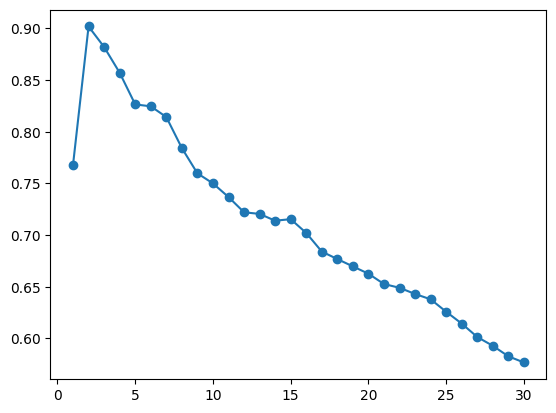

In [85]:
plt.plot(range(1,31),acclist,marker = 'o')
plt.show()

In [86]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(xtrain,ytrain)
yp = knn.predict(xtest)

In [87]:
r2_score(ytest,yp)

0.901934796765047